## Feature Selection

Process of choosing the most important variables (columns) in your data for analysis or modeling.
- Improve model accuracy 
- Reduce overfitting
- make results easier to interpret
- speed up computation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Perform Feature Selection on Training Data Only (avoid data leakage)
clean_merged_data = pd.read_csv("../data/clean_merged.csv")
clean_merged_data.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,...,cnt_fam_members,age,is_employed,years_employed,amt_income_log,max_delay,avg_delay,num_bad_months,months_total,label
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,32,1,12.435318,12.965712,1,0.000000,0,16,0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,32,1,12.435318,12.965712,1,0.000000,0,15,0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,58,1,3.104723,11.630717,0,-0.533333,0,30,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,52,1,8.353183,12.506181,0,-0.600000,0,5,0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,52,1,8.353183,12.506181,-1,-1.000000,0,5,0


In [3]:
X = clean_merged_data.drop("label", axis = 1)
y = clean_merged_data["label"]

### One-hot encoding for categorical columns

In [4]:
# One-hot encode on the entire X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

### Split to training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size = 0.2,       # 20% for testing, 80% for training (adjust as needed)
    random_state=  42,     # makes the split reproducible
    stratify = y           # keeps class balance if classification problem
)

In [6]:
X_train.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,flag_mobil,flag_work_phone,flag_phone,flag_email,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
5155,5025891,0,0,1,0,135000.0,1,0,1,0,...,False,False,False,False,False,False,False,False,True,False
229,5009072,0,1,1,0,270000.0,1,0,1,1,...,False,False,False,False,False,False,False,False,False,False
17709,5068201,1,1,1,0,180000.0,1,0,1,1,...,False,True,False,False,False,False,False,False,False,False
10802,5045999,0,0,1,1,225000.0,1,0,1,0,...,False,False,False,True,False,False,False,False,False,False
15990,5065454,1,0,1,0,180000.0,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29165 entries, 5155 to 18335
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 29165 non-null  int64  
 1   code_gender                                        29165 non-null  int64  
 2   flag_own_car                                       29165 non-null  int64  
 3   flag_own_realty                                    29165 non-null  int64  
 4   cnt_children                                       29165 non-null  int64  
 5   amt_income_total                                   29165 non-null  float64
 6   flag_mobil                                         29165 non-null  int64  
 7   flag_work_phone                                    29165 non-null  int64  
 8   flag_phone                                         29165 non-null  int64  
 9   flag_ema

### Handle leaky features 
- Leaky features are columns that “give away” the answer, either directly or indirectly.

Most dangerous leaky features
- max_delay
- avg_delay
- num_bad_months
- months_total

Drop ID column before Random Forest Training to prevent model from memorising unique identifiers

In [8]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

In [9]:
print(list(X_train.columns))

['code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total', 'flag_mobil', 'flag_work_phone', 'flag_phone', 'flag_email', 'cnt_fam_members', 'age', 'is_employed', 'years_employed', 'amt_income_log', 'max_delay', 'avg_delay', 'num_bad_months', 'months_total', 'name_income_type_Pensioner', 'name_income_type_State servant', 'name_income_type_Student', 'name_income_type_Working', 'name_education_type_Higher education', 'name_education_type_Incomplete higher', 'name_education_type_Lower secondary', 'name_education_type_Secondary / secondary special', 'name_family_status_Married', 'name_family_status_Separated', 'name_family_status_Single / not married', 'name_family_status_Widow', 'name_housing_type_House / apartment', 'name_housing_type_Municipal apartment', 'name_housing_type_Office apartment', 'name_housing_type_Rented apartment', 'name_housing_type_With parents', 'occupation_type_Cleaning staff', 'occupation_type_Cooking staff', 'occupation_type_Core staff', 'o

In [10]:
leaky_features = ['max_delay', 'avg_delay', 'num_bad_months', 'months_total']
X_train = X_train.drop(columns = leaky_features, errors = 'ignore')
X_test = X_test.drop(columns = leaky_features, errors = 'ignore')

## Random Forest Modelling

In [11]:
# Train Random forest classifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# Make predictions on test set
y_pred = rf_model.predict(X_test)

## Evaluate Model Performance

In [13]:
y_test = pd.read_csv("../data/y_test.csv")
print("Accuracy:", accuracy_score(y_test, y_pred))  # y_test loaded as true test targets
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9810751508502469

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7169
           1       0.35      0.15      0.21       123

    accuracy                           0.98      7292
   macro avg       0.67      0.57      0.60      7292
weighted avg       0.97      0.98      0.98      7292


Confusion Matrix:
 [[7136   33]
 [ 105   18]]


### Embedded Method (Random forest)

Tells us what features matter most.

In [14]:
# Get feature importances and feature names
importances = rf_model.feature_importances_
feature_names = X_train.columns

In [15]:
# Make a DataFrame for easy sorting/viewing
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp_df

,feature,importance
10,age,0.159245
12,years_employed,0.156107
4,amt_income_total,0.106605
13,amt_income_log,0.105296
9,cnt_fam_members,0.039238
1,flag_own_car,0.029803
3,cnt_children,0.027062
0,code_gender,0.026783
7,flag_phone,0.026169
2,flag_own_realty,0.025115


In [16]:
print(feat_imp_df.head(10))  # Show top 10 important features

             feature  importance
10               age    0.159245
12    years_employed    0.156107
4   amt_income_total    0.106605
13    amt_income_log    0.105296
9    cnt_fam_members    0.039238
1       flag_own_car    0.029803
3       cnt_children    0.027062
0        code_gender    0.026783
7         flag_phone    0.026169
2    flag_own_realty    0.025115


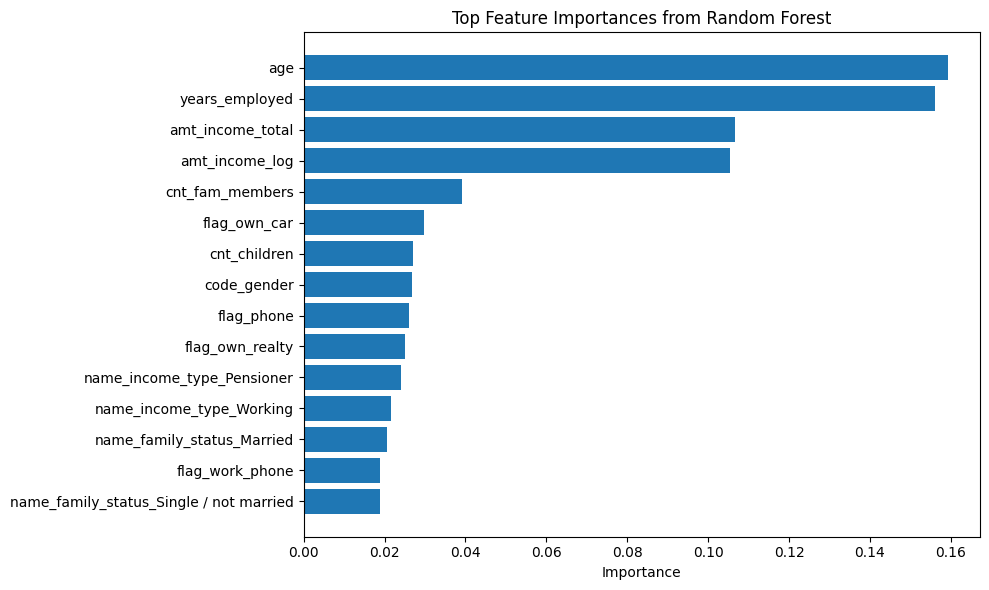

In [17]:
# Plot top N features (e.g., top 15)
N = 15
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['feature'][:N][::-1], feat_imp_df['importance'][:N][::-1])
plt.xlabel('Importance')
plt.title('Top Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

#### Reduce train and test to selected features

In [18]:
N = 10
top_features = feat_imp_df['feature'].iloc[:N].tolist()
top_features

['age',
 'years_employed',
 'amt_income_total',
 'amt_income_log',
 'cnt_fam_members',
 'flag_own_car',
 'cnt_children',
 'code_gender',
 'flag_phone',
 'flag_own_realty']

In [19]:
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

#### Retrain Random Forest on top 15 important features 

In [20]:
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Re-evaluate the model again 

In [21]:
y_pred_reduced = rf_reduced.predict(X_test_reduced)

print("Accuracy with reduced features:", accuracy_score(y_test, y_pred_reduced))

print("\nClassification Report:\n", classification_report(y_test, y_pred_reduced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_reduced))

Accuracy with reduced features: 0.9810751508502469

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7169
           1       0.37      0.17      0.23       123

    accuracy                           0.98      7292
   macro avg       0.68      0.58      0.61      7292
weighted avg       0.98      0.98      0.98      7292


Confusion Matrix:
 [[7133   36]
 [ 102   21]]


#### Plot ROC Curve and calculate AUC

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [23]:
y_proba = rf_reduced.predict_proba(X_test_reduced)[:, 1]  # Probability of class '1'

In [24]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)  # y_test = true labels
# Calculate AUC
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score:.3f}")

AUC: 0.791


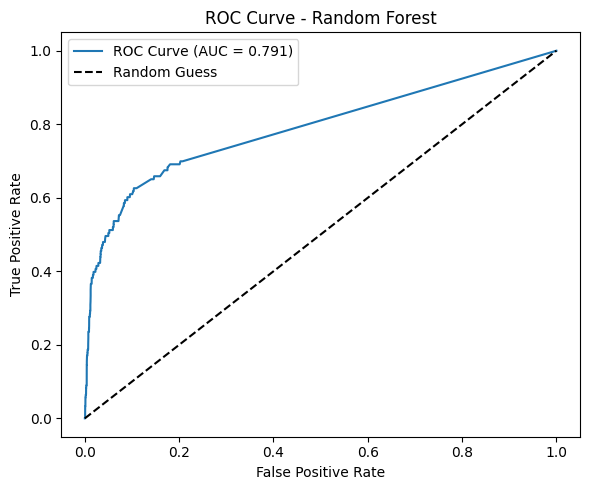

In [25]:
# Plot the ROC Curve
plt.figure(figsize = (6, 5))
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.tight_layout()
plt.show()

## Hyperparameter Tuning with GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [27]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state = 42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=1,       # <<< Only use 1 job (no parallel, less stress on env)
    verbose=2
)
grid_rf.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   2.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, m

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200]}"
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [28]:
print("Best Random Forest params:", grid_rf.best_params_)
print("Best cross-validated AUC:", grid_rf.best_score_)

Best Random Forest params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated AUC: 0.7678969114611366


In [29]:
# Evaluate the Best Model on Test Set
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Predict probabilities (for AUC) and classes
y_proba = grid_rf.best_estimator_.predict_proba(X_test_reduced)[:, 1]
y_pred = grid_rf.best_estimator_.predict(X_test_reduced)

# Evaluate
print("Test set ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test set ROC AUC: 0.7934529540580662
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7169
           1       0.34      0.12      0.18       123

    accuracy                           0.98      7292
   macro avg       0.66      0.56      0.59      7292
weighted avg       0.97      0.98      0.98      7292

Confusion Matrix:
 [[7140   29]
 [ 108   15]]


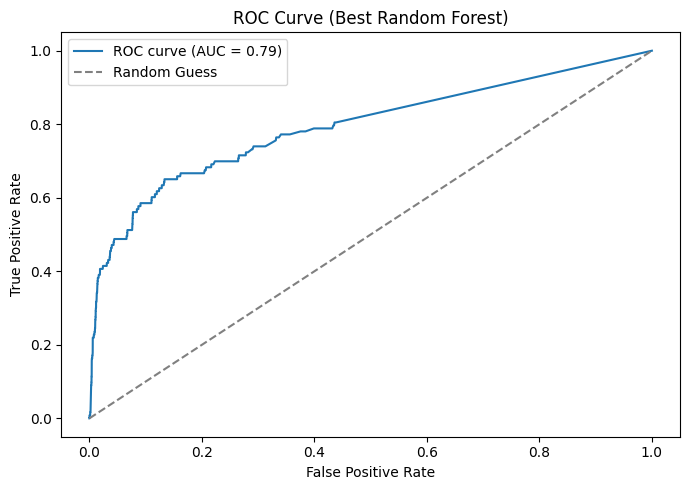

In [30]:
# Plot ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize = (7,5))
plt.plot(fpr, tpr, label = f"ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color = 'grey', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Best Random Forest)")
plt.legend()
plt.tight_layout()
plt.show()

Training a model (esp with grid search) can take a long time.

By saving the model, can reload it later in seconds and use it to make predictions, no need to retrain.

In [31]:
import joblib
joblib.dump(grid_rf.best_estimator_, 'best_random_forest.pkl')

['best_random_forest.pkl']

## XGBoost

In [32]:
import xgboost as xgb

In [33]:
# Initialize the classifier (basic params)
xgb_clf = xgb.XGBClassifier(
    n_estimators = 100,
    max_depth = 5,
    learning_rate = 0.1,
    use_label_encoder = False,   # avoid deprecation warning
    eval_metric = 'logloss',     # set for classification
    random_state = 42
)

# Fit on training data
xgb_clf.fit(X_train_reduced, y_train)

c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### Predict and Evaluate on the Test Set

In [34]:
# Get predicted probabilities for ROC AUC
y_proba = xgb_clf.predict_proba(X_test_reduced)[:, 1]
y_pred = xgb_clf.predict(X_test_reduced)

print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test ROC AUC: 0.6520327471373472
Test Accuracy: 0.9831321996708722
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7169
           1       0.00      0.00      0.00       123

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.97      7292



c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

### Hyperparameter Tuning with GridSearchCV

In [ ]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_base = xgb.XGBClassifier(
    use_label_encoder = False, 
    eval_metric = 'logloss',
    random_state = 42
)

grid_xgb = GridSearchCV(
    estimator = xgb_base,
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv = 3,
    n_jobs = 1,           # to avoid subprocess errors
    verbose = 2
)

grid_xgb.fit(X_train_reduced, y_train)

c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\wongz\OneDrive\Desktop\CS3244\src\cs3244-project\cs3244\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:19:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated AUC: 0.7527795529715297


In [37]:
print("Best params:", grid_xgb.best_params_)
print("Best cross-validated AUC:", grid_xgb.best_score_)

Best params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated AUC: 0.7527795529715297


### Use the best estimator found by grid search 

In [38]:
best_xgb = grid_xgb.best_estimator_

# Predict on test data
y_pred = best_xgb.predict(X_test_reduced)
y_proba = best_xgb.predict_proba(X_test_reduced)[:, 1]

### Check Performance on Test Set

In [39]:
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test ROC AUC: 0.7234842427933277
Test Accuracy: 0.9816236972024136
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7169
           1       0.28      0.06      0.09       123

    accuracy                           0.98      7292
   macro avg       0.63      0.53      0.54      7292
weighted avg       0.97      0.98      0.98      7292

Confusion Matrix:
 [[7151   18]
 [ 116    7]]


### Plot ROC Curve

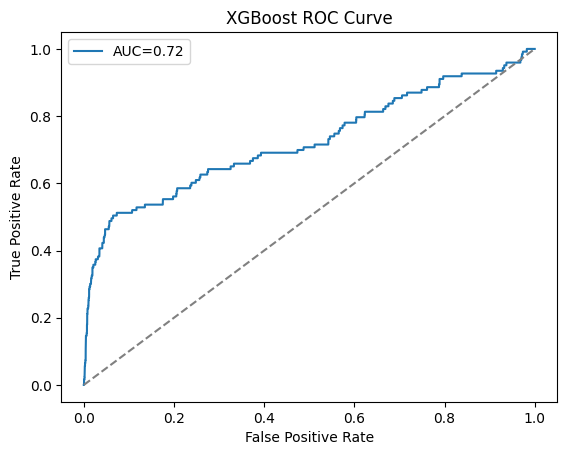

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC={roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.show()